<a href="https://colab.research.google.com/github/vishnurapps/Study/blob/master/dileep_teja3_gmail_com_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import c_

In [0]:
dataset = load_boston()
X = pd.DataFrame(dataset.data)
y = dataset.target

In [0]:
X_tr, X_te, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [0]:
# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_tr)
X_test = sc.transform(X_te)

In [5]:
print(X_train.shape)
print(X_test.shape)

(339, 13)
(167, 13)


In [6]:
X_train.shape[0]

339

## SGD Implementation of our own:

In [0]:
from math import log
xTrain,xTest,yTrain,yTest=train_test_split(X_train,Y_train,test_size=0.3)
xTrain,xCv,yTrain,yCv=train_test_split(xTrain,yTrain,test_size=0.3)
# xTrain = scaler.transform(xTrain)
# xCv=scaler.transform(xCv)
# X_te = np.c_[np.ones((len(X_test),1)),X_test]
# X_test = X_te
# X_te = np.c_[np.ones((len(X_test),1)),X_test]
# X_test = X_te

def tuneParams_learning_rate():
  train_error=[]
  cv_error=[]
  r=[0.00001,0.0001,0.001,0.01,0.1]
  for itr in r:
    w = customSGD(xTrain, yTrain, iterations = 1000, learning_rate = itr)
    X_te = np.c_[np.ones((len(xTrain),1)),xTrain]
    xTrain1 = X_te
    yPred_train=xTrain1.dot(w)
    train_error.append(mean_squared_error(yTrain,yPred_train))
    w = customSGD(xCv, yCv, iterations = 1000, learning_rate = itr)
    X_te = np.c_[np.ones((len(xCv),1)),xCv]
    xCv1 = X_te
    yPred_cv=xCv1.dot(w)
    cv_error.append(mean_squared_error(yCv,yPred_cv))
  return train_error,cv_error

In [0]:

# iterations = 1000
# learning_rate = 0.01
# length = 339
# # print(length)
def customSGD(X_train, Y_train, iterations, learning_rate):
  length = X_train.shape[0]
  X_tr = np.c_[np.ones((len(X_train),1)),X_train]
  X_train = X_tr

  weights = np.random.normal(0,1,X_train.shape[1])
  weights = np.c_[weights]
  # weights = weights.reshape(1,13)

  for k in range(iterations):
      for i in range(length):
          rand_size = np.random.randint(0,length)

          X_bat_size = X_train[rand_size,:].reshape(1,X_train.shape[1])
          y_bat_size = Y_train[rand_size].reshape(1,1)

          prediction = np.dot(X_bat_size,weights)
          weights = weights -(2/length)*learning_rate*( X_bat_size.T.dot((prediction - y_bat_size)))
      #preds = X_test.dot(weights)
      #Mse_cust = mean_squared_error(Y_test, preds)
      # print("Mean Squared Error (MSE) = ",Mse_cust)
  return weights
# print(X_bat_size.shape)
# print(y_bat_size.shape)

In [0]:
train_error,cv_error=tuneParams_learning_rate()

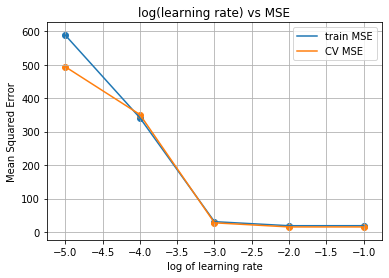

In [15]:
# plotting obtained values
import math
r=[0.00001,0.0001,0.001,0.01,0.1]
x1=[math.log10(i) for i in r]
plt.plot(x1,train_error,label='train MSE')
plt.plot(x1,cv_error,label='CV MSE')
plt.scatter(x1,train_error)
plt.scatter(x1,cv_error)
plt.legend()
plt.xlabel('log of learning rate')
plt.ylabel('Mean Squared Error')
plt.title('log(learning rate) vs MSE')
plt.grid()
plt.show()

### Now we'll test the obtained weight vector on test data

In [0]:
preds = X_test.dot(weights)

In [0]:
plt.scatter(Y_test, preds)
plt.xlabel("Actual",size=20)
plt.ylabel("Predicted",size=20)
plt.title("Actual vs Predicted",size=30)
plt.grid()
plt.show()

In [0]:
Mse_cust = mean_squared_error(Y_test, preds)
print("Mean Squared Error (MSE) = ",Mse_cust)


## SGD Implementation of our SKlearn:

In [0]:
model = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant')
model.fit(X_train,Y_train)
sklearn_preds = model.predict(X_test)

In [0]:
sklearn_weights = model.coef_
sklearn_weights

In [0]:
plt.scatter(Y_test, sklearn_preds)
plt.xlabel("Actual",size=20)
plt.ylabel("Predicted",size=20)
plt.title("Actual vs Predicted",size=30)
plt.grid()
plt.show()

In [0]:
Mse_sk = mean_squared_error(Y_test, sklearn_preds)
print("Mean Squared Error (MSE) = ",Mse_sk)

## Comparing both the models

In [0]:
from prettytable import PrettyTable
table = PrettyTable()
no = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
table.add_column("NO.",no)
table.add_column("Weights of our SGD",weights)
table.add_column("Weights of Sklear SGD",sklearn_weights)
print(table)

In [0]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["SGD","MSE"]
table.add_row(["Custom SGD",Mse_cust])
table.add_row(["Sklearn SGD",Mse_sk])
print(table)